In [203]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [204]:
data = fetch_california_housing()

In [205]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [206]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [207]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [208]:
price = data.target

In [209]:
data = pd.DataFrame(data= data.data, columns = data.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [210]:
data = data.assign(price = price)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [211]:
def numerical_values():
    numerical_columns = [i for i in data.columns
                        if data[i].dtypes in ['int64', 'float64']]
def categorical_values(): 
    categorical_columns = [i for i in data.columns
                          if data[i].dtypes in ['object']]

In [212]:
numerical_columns = numerical_values()

In [213]:
categorical_columns = categorical_values()

In [214]:
def find_missing_values():
    missing_values_col = []
    missing_values_col = list(data.columns[data.isna().any()])
    for col in missing_values_col:
        print(col, ": ", data.isna().sum())
        missing_values_col.append(col)
missing_values_col = find_missing_values()

In [215]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


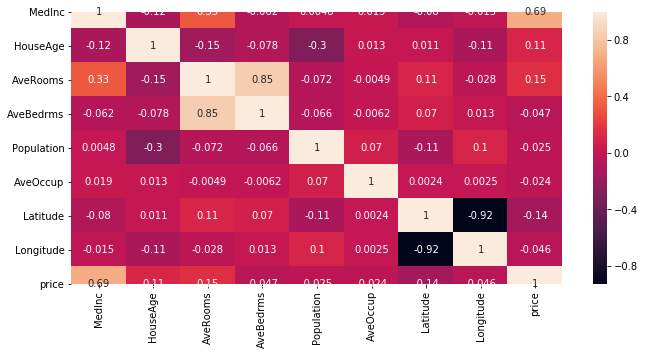

In [216]:
plt.figure(figsize=(11,5))
correlation_heatmap = sns.heatmap(data.corr(), annot = True)

In [217]:
# g = sns.pairplot(data, diag_kind = 'kde', kind ='reg')
# g
# data_trail = pd.concat([data['MedInc'], data['AveBedrms'], data['Population'],
#                           data['AveOccup'], data['Latitude'], data['price']], axis =1)
# g = sns.pairplot(data_trail, diag_kind = 'kde', kind ='reg')
# # g

In [241]:
# we can first remove values with lower correlation 
#mediam income is highly correlated to price
# AveRooms and House Age are no correlated 
# other are negatively correlated
#with this we can drop values that are no correlated to the price
pre_data = data.drop(columns = ['price'],axis = 1)
all_data = list(pre_data.columns)
print(all_data)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [242]:
# from sklearn.feature_selection import SelectKBest, f_classif
# features_cols  = data.columns.drop('price')
# selector = SelectKBest(f_classif, k =6)
# X_new = selector.fit_transform(data[features_cols], data['price'])
# X_new

In [243]:
# X = pre_data.loc[:,all_data].values
# y = data.loc[:,["price"]].values

X = pre_data.loc[:,all_data[0]:all_data[-2]].values
y = pre_data.loc[:,[all_data[-1]]].values


In [244]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

# data_array = X.to_numpy()
X = StandardScaler().fit_transform(X)
# X = PowerTransformer().fit_transform(X)
# y = PowerTransformer().fit_transform(y)
svd  = TruncatedSVD(n_components = 2, n_iter =7 , random_state = 42)
svd_components = svd.fit_transform(X)
svd.explained_variance_ratio_


array([0.27721002, 0.19407958])

In [245]:
new_dataframe = pd.DataFrame(svd_components, columns = ['latent1','latent2'])


In [246]:
final_data = pd.concat([new_dataframe,data['price']], axis =1 )
final_data

,latent1,latent2,price
0,0.844493,-0.851754,4.526
1,0.733891,1.309451,3.585
2,0.997781,-1.459820,3.521
3,0.112927,-1.664796,3.413
4,0.053761,-1.949235,3.422
...,...,...,...
20635,-0.033420,-1.089946,0.781
20636,0.751678,-0.931246,0.771
20637,0.110637,-0.584407,0.923
20638,0.234638,-0.776173,0.847


In [247]:
final_data.describe()

,latent1,latent2,price
count,2.064000e+04,2.064000e+04,20640.000000
mean,5.075075e-18,2.274128e-16,2.068558
std,1.393041e+00,1.165600e+00,1.153956
min,-2.292771e+00,-1.141274e+01,0.149990
25%,-5.230169e-01,-7.549365e-01,1.196000
50%,-1.439009e-01,-9.367164e-02,1.797000
75%,2.921795e-01,6.339733e-01,2.647250
max,8.113558e+01,2.050103e+01,5.000010


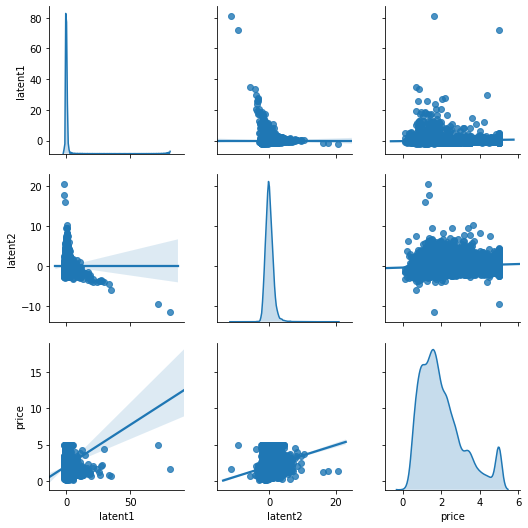

In [248]:
sns.pairplot(final_data, diag_kind = 'kde',kind = 'reg')

In [249]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test  = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 0)

results = {}
models = { 'Linear Regression': linear_model.LinearRegression(),
           'Lasso': linear_model.Lasso(),
           'Ridge': linear_model.Ridge(),
           'Xgboost': XGBRegressor(n_estimators=1000, learning_rate=0.05),
           'RandomForest':RandomForestRegressor(random_state =1 ),
            'ElasticRgression': linear_model.ElasticNet(),
            }
for model in models:
    models[model].fit(X_train, y_train)
    accuracy = models[model].score(X_test, y_test)
    results[model] = [accuracy]
pd.DataFrame(results)

C:\Users\jonathan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


,Linear Regression,Lasso,Ridge,Xgboost,RandomForest,ElasticRgression
0,0.879365,0.606368,0.879376,0.948025,0.944888,0.629436


In [250]:
def my_model1(results):
    results = {}
    models =  {
        'Linear Regression': linear_model.LinearRegression(),
        'RandomForest':RandomForestRegressor(),
        'Xgboost': XGBRegressor(n_estimators=1000, learning_rate=0.05),
        'Lasso': linear_model.Lasso(),
        'Ridge': linear_model.Ridge(),
        'ElasticRgression': linear_model.ElasticNet(),
            }
    for model in models:
        models[model].fit(X_train, y_train)
        accuracy = models[model].score(X_test, y_test)
        results[model] = [accuracy]
    print(pd.DataFrame(results))
    
# model = my_model1(results)
pd.DataFrame(results)


,Linear Regression,Lasso,Ridge,Xgboost,RandomForest,ElasticRgression
0,0.879365,0.606368,0.879376,0.948025,0.944888,0.629436


In [251]:
Kfold = KFold(n_splits = 6)
for model in  models:
    regressor = models[model]
    c_validated = cross_val_score(regressor, X_train, y_train, cv= Kfold)
    accuracy = c_validated.mean()
    results[model] = [accuracy]
pd.DataFrame(results)

C:\Users\jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column

,Linear Regression,Lasso,Ridge,Xgboost,RandomForest,ElasticRgression
0,0.890553,0.608215,0.890553,0.950259,0.947749,0.631382
